<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/ProtFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1d165cca9bda78a3aa6a95fa0d0f56d5917508f60299b7e9d9417dd6c86ddc76
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

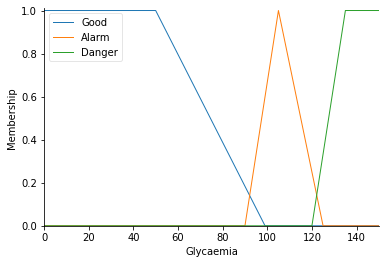

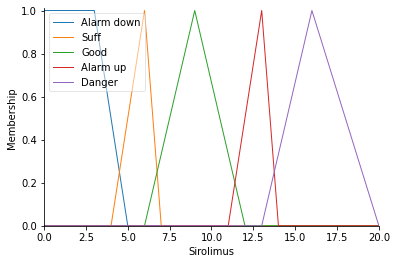

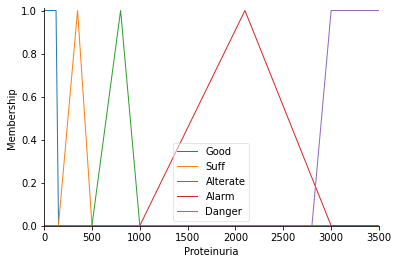

In [9]:
Glycaemia   = ctrl.Antecedent(np.arange(0,151,1),'Glycaemia')
Sirolimus   = ctrl.Antecedent(np.arange(0,21,1),'Sirolimus')
Proteinuria = ctrl.Consequent(np.arange(0,3501,1),'Proteinuria')

Glycaemia['Good'] = fuzz.trapmf(Glycaemia.universe,[0,0,50,99])
Glycaemia['Alarm'] = fuzz.trimf(Glycaemia.universe,[90,105,125])
Glycaemia['Danger'] = fuzz.trapmf(Glycaemia.universe,[120,135,150,150])

Sirolimus['Alarm down'] = fuzz.trapmf(Sirolimus.universe,[0, 0, 3, 5])
Sirolimus['Suff'] = fuzz.trimf(Sirolimus.universe,[4, 6, 7])
Sirolimus['Good'] = fuzz.trimf(Sirolimus.universe,[6, 9, 12])
Sirolimus['Alarm up'] = fuzz.trimf(Sirolimus.universe,[11, 13 ,14])
Sirolimus['Danger'] = fuzz.trimf(Sirolimus.universe,[13, 16, 20])

Proteinuria['Good'] = fuzz.trapmf(Proteinuria.universe,[0, 0, 125, 150])
Proteinuria['Suff'] = fuzz.trimf(Proteinuria.universe,[150, 350, 500])
Proteinuria['Alterate'] = fuzz.trimf(Proteinuria.universe,[500, 800, 1000])
Proteinuria['Alarm'] = fuzz.trimf(Proteinuria.universe,[1000, 2100, 3000])
Proteinuria['Danger'] = fuzz.trapmf(Proteinuria.universe,[2800, 3000, 3500, 3500])

Glycaemia.view()
Sirolimus.view()
Proteinuria.view()



In [18]:
rule1 = ctrl.Rule(Glycaemia['Good'] & Sirolimus['Good'] , Proteinuria['Good'])
rule2 = ctrl.Rule(Glycaemia['Danger'] & Sirolimus['Danger'] , Proteinuria['Danger'])
rule3 = ctrl.Rule(Glycaemia['Good'] & Sirolimus['Suff'] , Proteinuria['Suff'])
rule4 = ctrl.Rule(Glycaemia['Alarm'] & Sirolimus['Alarm up'] , Proteinuria['Alarm'])
rule5 = ctrl.Rule(Glycaemia['Alarm'] & Sirolimus['Suff'] , Proteinuria['Alterate'])
rule6 = ctrl.Rule(Glycaemia['Good'] & Sirolimus['Alarm up'] , Proteinuria['Alterate'])
rule7 = ctrl.Rule(Glycaemia['Alarm'] & Sirolimus['Good'] , Proteinuria['Suff'])
rule8 = ctrl.Rule(Glycaemia['Good'] & Sirolimus['Alarm down'] , Proteinuria['Suff'])

327.97619047619054


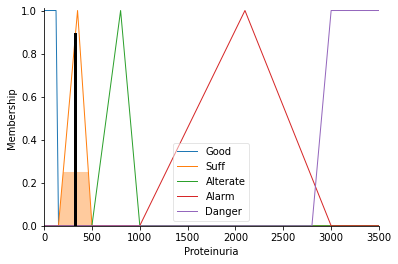

In [21]:
Proteinuriaring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
Proteinuriaring = ctrl.ControlSystemSimulation(Proteinuriaring_ctrl)
Proteinuriaring.input['Glycaemia'] = 120
Proteinuriaring.input['Sirolimus'] = 10
Proteinuriaring.compute()
print(Proteinuriaring.output['Proteinuria'])
Proteinuria.view(sim = Proteinuriaring)